# Week3
# Fashion MNIST 

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Understanding the Dataset and Pre-processing:

In [2]:
fmnist = fashion_mnist
(x_train, y_train),(x_test,y_test) = fmnist.load_data()

Training set shape: (60000, 28, 28)
Training set shape: (10000, 28, 28)



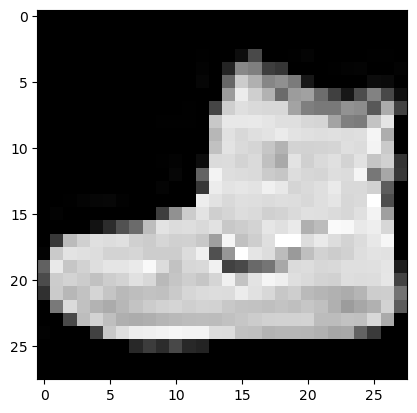

In [3]:
print(f"Training set shape: {x_train.shape}")
print(f"Training set shape: {x_test.shape}\n")

#find minimum and maximum values of one sample data
np.max(x_train[0])
np.min(x_train[0])

#display one sample data/image in gray-scale
plt.imshow(x_train[0],cmap="gray")


### Compute and display the number of classes.

In [4]:
print('The Total number of Classes are: ',len(np.unique(y_train)))

The Total number of Classes are:  10


### Compute and display the dimensions of each image.

In [5]:
print('The Dimension of each image is: ',x_train[0].shape)#implies that its a gray scale image

The Dimension of each image is:  (28, 28)


### Display one image from each class.

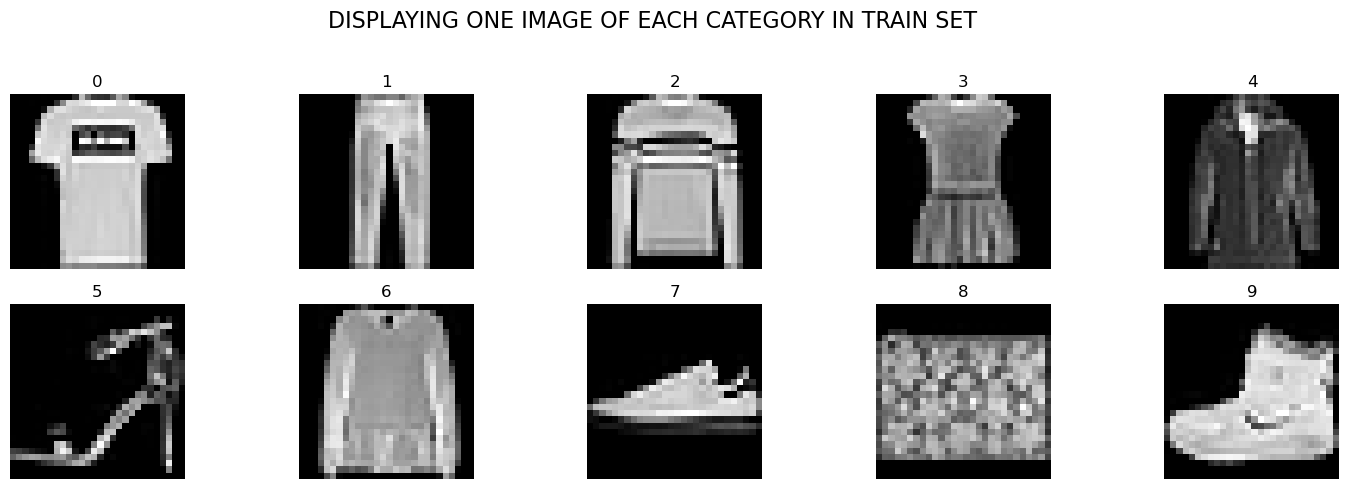

In [6]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category in train set'.upper(), 
             y= 1.05, fontsize= 16)
i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train[list(y_train).index(i)],cmap="gray")
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1
plt.show()

### Perform normalization.

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

# Performing experiments on Fully Connected Neural Networks (FCNN):

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Define the model architecture
model = Sequential([
    Flatten(input_shape=[28, 28], name="inputLayer"),
    Dense(512, activation="relu", name="HiddenLayer1"),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(256, activation="relu", name="HiddenLayer2"),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(128, activation="relu", name="HiddenLayer3"),
    Dense(10, activation="softmax", name="outputLayer")
])

model.summary()

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 HiddenLayer2 (Dense)        (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 HiddenLayer3 (Dense)        (None, 128)               32896     
                                                                 
 outputLayer (Dense)         (None, 10)                1

In [12]:
# Early stopping to prevent overfitting
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time
start = datetime.datetime.now()

# Train the model
#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Record end time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)


Epoch 1/15
1688/1688 [==============================] - 18s 10ms/step - loss: 0.5676 - accuracy: 0.7951 - val_loss: 0.4103 - val_accuracy: 0.8487
Epoch 2/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.4360 - accuracy: 0.8417 - val_loss: 0.3908 - val_accuracy: 0.8587
Epoch 3/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3977 - accuracy: 0.8539 - val_loss: 0.3632 - val_accuracy: 0.8670
Epoch 4/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3721 - accuracy: 0.8640 - val_loss: 0.3541 - val_accuracy: 0.8750
Epoch 5/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3550 - accuracy: 0.8706 - val_loss: 0.3445 - val_accuracy: 0.8807
Epoch 6/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3427 - accuracy: 0.8738 - val_loss: 0.3551 - val_accuracy: 0.8695
Epoch 7/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3344 - accuracy: 0.8762 - val_loss: 0.3585 -

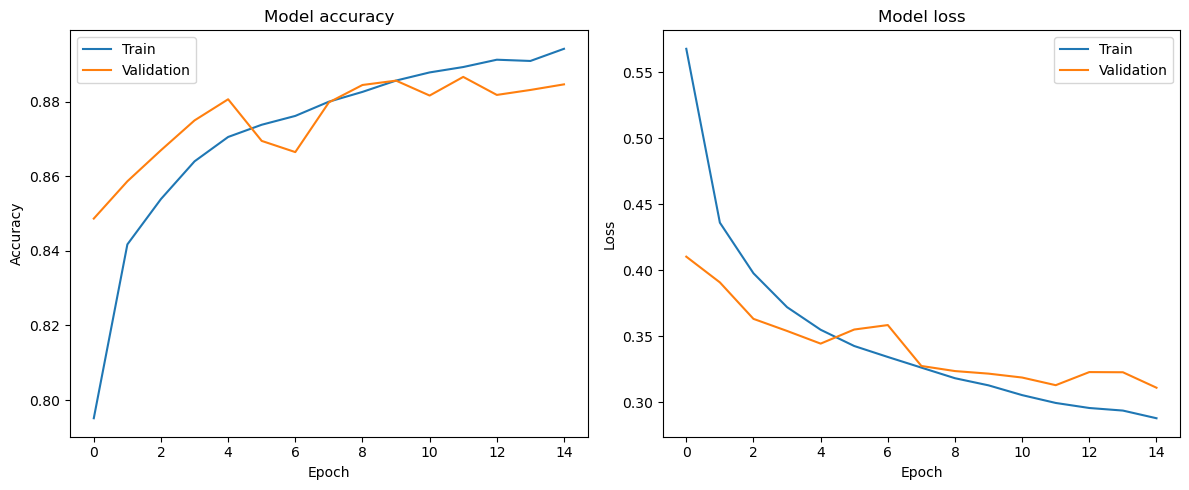

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


# Performing experiments on a Convolutional Neural Networks (CNNs):

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Define CNN-1 architecture
cnn1_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1), name="conv1"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name="maxpool1"),
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer")
])

cnn1_model.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

cnn1_model.summary()

# Compile the model
cnn1_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 hiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Define CNN-2 architecture
cnn2_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1), name="conv1"),
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', name="conv2"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name="maxpool1"),
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer")
])

cnn2_model.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

cnn2_model.summary()

# Compile the model
cnn2_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 conv2 (Conv2D)              (None, 24, 24, 32)        9248      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 hiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 471478 (1.80 MB)
Trainable params: 47147

In [13]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn1 = datetime.datetime.now()

# Train CNN-1
history_cnn1 = cnn1_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn1 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn1-start_cnn1)

# Record start time for CNN-2
start_cnn2 = datetime.datetime.now()

# Train CNN-2
history_cnn2 = cnn2_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-2
end_cnn2 = datetime.datetime.now()
print("\nTime taken to run CNN-2:", end_cnn2-start_cnn2)


Epoch 1/15
1688/1688 [==============================] - 22s 13ms/step - loss: 0.4167 - accuracy: 0.8519 - val_loss: 0.3327 - val_accuracy: 0.8797
Epoch 2/15
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2842 - accuracy: 0.8975 - val_loss: 0.2845 - val_accuracy: 0.8988
Epoch 3/15
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2405 - accuracy: 0.9113 - val_loss: 0.2658 - val_accuracy: 0.9048
Epoch 4/15
1688/1688 [==============================] - 23s 13ms/step - loss: 0.2047 - accuracy: 0.9247 - val_loss: 0.2508 - val_accuracy: 0.9090
Epoch 5/15
1688/1688 [==============================] - 23s 13ms/step - loss: 0.1787 - accuracy: 0.9333 - val_loss: 0.2531 - val_accuracy: 0.9092
Epoch 6/15
1688/1688 [==============================] - 21s 13ms/step - loss: 0.1555 - accuracy: 0.9424 - val_loss: 0.2713 - val_accuracy: 0.9073
Epoch 7/15
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1352 - accuracy: 0.9506 - val_loss: 0.2714 -

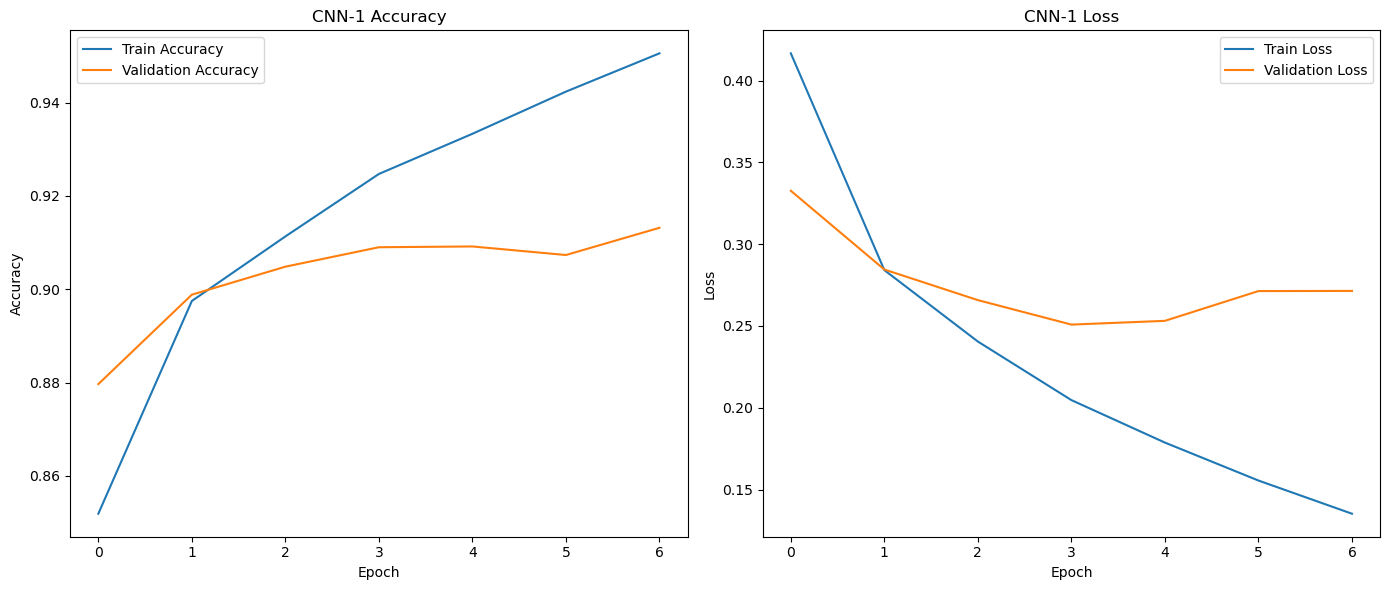

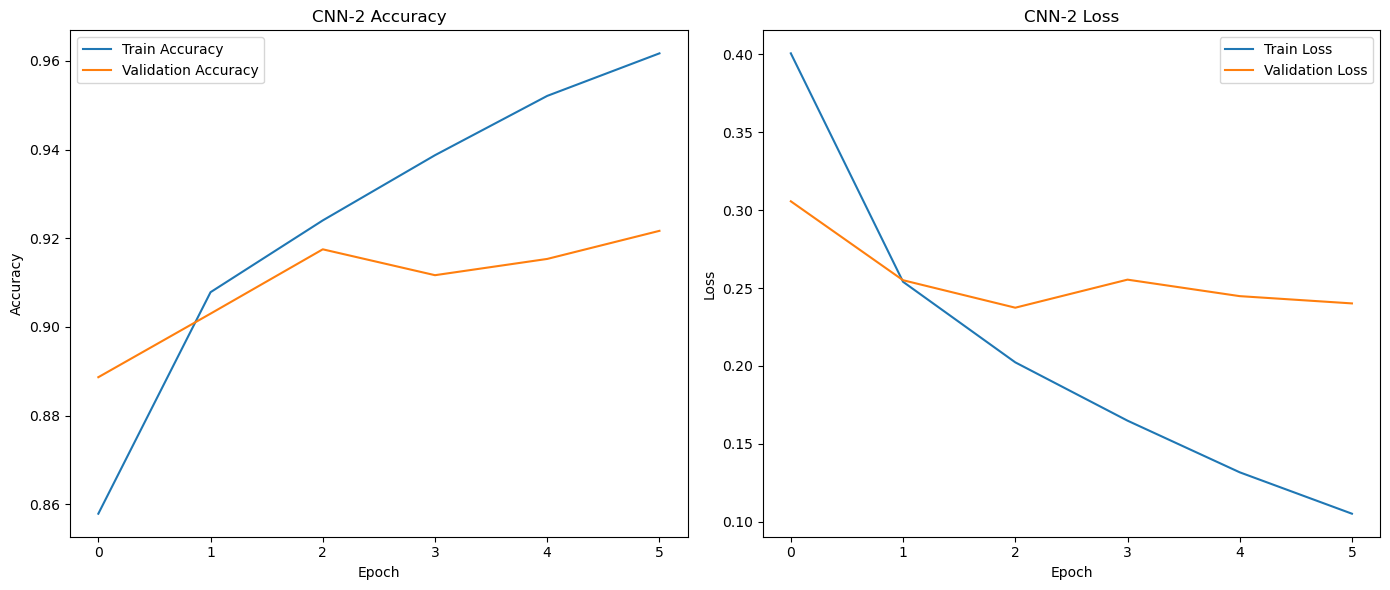

In [14]:
# Plot performance curves for CNN-1
plt.figure(figsize=(14, 6))

# Plot for CNN-1
plt.subplot(1, 2, 1)
plt.plot(history_cnn1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn1.history['loss'], label='Train Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.title('CNN-1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot performance curves for CNN-2
plt.figure(figsize=(14, 6))

# Plot for CNN-2
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], label='Train Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('CNN-2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Evaluate CNN-1 on the test set
test_loss_cnn1, test_accuracy_cnn1 = cnn1_model.evaluate(x_test, y_test)
print(f"CNN-1 Test Accuracy: {test_accuracy_cnn1}, Test Loss: {test_loss_cnn1}")

# Evaluate CNN-2 on the test set
test_loss_cnn2, test_accuracy_cnn2 = cnn2_model.evaluate(x_test, y_test)
print(f"CNN-2 Test Accuracy: {test_accuracy_cnn2}, Test Loss: {test_loss_cnn2}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.9071
CNN-1 Test Accuracy: 0.9071000218391418, Test Loss: 0.2587294578552246
313/313 [==============================] - 2s 7ms/step - loss: 0.2453 - accuracy: 0.9070
CNN-2 Test Accuracy: 0.9070000052452087, Test Loss: 0.24533386528491974


##### We can see that the CNN2 performs slightly better compared to the CNN1

In [16]:
#Implementing a CNN Model with a more complex fcnn
cnn3_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1), name="conv1"),
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', name="conv2"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name="maxpool1"),
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(512, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(256, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer3"),
])
cnn3_model.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

cnn3_model.summary()

# Compile the model
cnn3_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 conv2 (Conv2D)              (None, 24, 24, 32)        9248      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 512)               2359808   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 HiddenLayer2 (Dense)        (None, 256)              

In [ ]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn3 = datetime.datetime.now()

# Train CNN-1
history_cnn3 = cnn3_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn3 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn3-start_cnn3)

Epoch 1/15
1688/1688 [==============================] - 86s 50ms/step - loss: 0.4290 - accuracy: 0.8441 - val_loss: 0.2957 - val_accuracy: 0.8918
Epoch 2/15
1688/1688 [==============================] - 83s 49ms/step - loss: 0.2655 - accuracy: 0.9032 - val_loss: 0.2416 - val_accuracy: 0.9117
Epoch 3/15
1688/1688 [==============================] - 83s 49ms/step - loss: 0.2184 - accuracy: 0.9213 - val_loss: 0.2384 - val_accuracy: 0.9110
Epoch 4/15
1465/1688 [=========================>....] - ETA: 10s - loss: 0.1802 - accuracy: 0.9351

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn3.history['accuracy'])
plt.plot(history_cnn3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn3.history['loss'])
plt.plot(history_cnn3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


`Conclusion` :
- We can see that the CNN performs better than the FCNN and the fully connected neural networks that are in the CNN contribute more towars the number of parameters in the CNN,but compared to fcnn cnn has less number of parameters due to its properties like sparse connectivity,shared weights